<a href="https://colab.research.google.com/github/R1chardJr/Perceptron-AND---OR/blob/main/Perceptron_2_variable_Handcrafted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using a Perceptron to solve a two-variable OR gate problem.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Perceptron_OR:
    def __init__(self,bias,w1,w2,learning_rate=0.3):
        self.bias = bias
        self.w1 = w1
        self.w2 = w2
        self.learning_rate = learning_rate
        self.w1_history = [w1]
        self.w2_history = [w2]
        self.bias_history = [bias]

    def tests(self,x1,x2):
        test = x1*self.w1 + x2*self.w2 + self.bias
        if test > 0:
          return 1
        else:
          return 0

    def train(self):
        training_data = [(0,0),(0,1),(1,0),(1,1)] # possible input of x1 and x2
        epochs = 0
        while True:
          errors = 0
          for x1,x2 in training_data:
              if not self.valid(x1,x2):
                self.error_correction(x1,x2)
                errors += 1
          epochs += 1
          if errors == 0:
            print(f"After {epochs} epochs, perceptron is ready")
            break

    def valid(self,x1,x2):
        if (x1 == 0 and x2 == 0) and self.tests(x1,x2) == 0:
            return True
        elif (x1 != 0 or x2 != 0) and self.tests(x1,x2) == 1:
            return True
        else:
            return False

    def error_correction(self,x1,x2):
        if x1 == 0 and x2 == 0: #expected output == 0
          error = 0 - self.tests(x1,x2)
          delta_bias = self.learning_rate * error
          delta_w1 = self.learning_rate * error * x1
          delta_w2 = self.learning_rate * error * x2

        else: #expected output == 1
          error = 1 - self.tests(x1,x2)
          delta_bias = self.learning_rate * error
          delta_w1 = self.learning_rate * error * x1
          delta_w2 = self.learning_rate * error * x2

        self.w1 = self.w1 + delta_w1
        self.w2 = self.w2 + delta_w2
        self.bias = self.bias + delta_bias
        self.w1_history.append(self.w1)
        self.w2_history.append(self.w2)
        self.bias_history.append(self.bias)

    def graph(self):
      epochs = range(len(self.w1_history))

      plt.plot(epochs, self.w1_history, label="w1")
      plt.plot(epochs, self.w2_history, label="w2")
      plt.plot(epochs, self.bias_history, label="bias")
      plt.xlabel("Correções")
      plt.ylabel("Valor")
      plt.title("Evolução dos pesos e bias")
      plt.legend()
      plt.grid(True)
      plt.show()

    def __str__(self):
      return f"{self.__class__.__name__}: {''.join([f'{chave} = {valor} / ' for chave,valor in self.__dict__.items()])}"

In [3]:
neuronOR = Perceptron_OR(bias=0, w1=0, w2=0)
neuronOR.train()

After 4 epochs, perceptron is ready


In [4]:
print(neuronOR)

Perceptron_OR: bias = 0.0 / w1 = 0.3 / w2 = 0.3 / learning_rate = 0.3 / w1_history = [0, 0.0, 0.0, 0.3, 0.3] / w2_history = [0, 0.3, 0.3, 0.3, 0.3] / bias_history = [0, 0.3, 0.0, 0.3, 0.0] / 


In [5]:
#just testing to see if is everything allright
for x1, x2 in [(0,0), (0,1), (1,0), (1,1)]:
    print(f"{x1} OR {x2} = {neuronOR.tests(x1, x2)}")

0 OR 0 = 0
0 OR 1 = 1
1 OR 0 = 1
1 OR 1 = 1


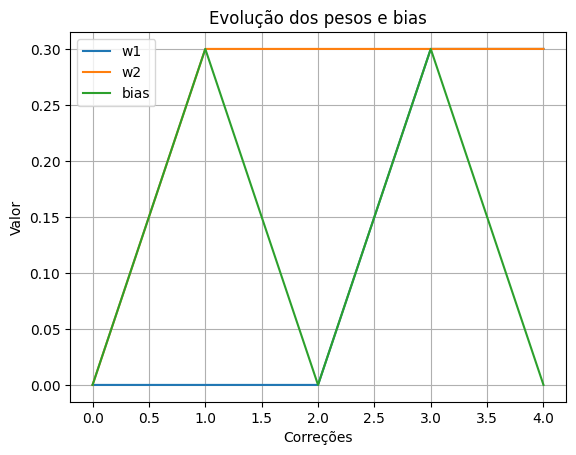

In [6]:
#Plotting how the parameter values change throughout training.
neuronOR.graph()

Now, we are using a perceptron to solve the AND gate problem.

In [7]:
class Perceptron_AND:
    def __init__(self,bias,w1,w2,learning_rate = 0.3):
        self.bias = bias
        self.w1 = w1
        self.w2 = w2
        self.learning_rate = learning_rate
        self.w1_history = [w1]
        self.w2_history = [w2]
        self.bias_history = [bias]

    def tests(self,x1,x2):
        test = x1*self.w1 + x2*self.w2 + self.bias
        if test > 0:
          return 1
        else:
          return 0

    def train(self):
        training_data = [(0,0),(0,1),(1,0),(1,1)] # possible input of x1 and x2
        epochs = 0
        while True:
          errors = 0
          for x1,x2 in training_data:
              if not self.valid(x1,x2):
                self.error_correction(x1,x2)
                errors += 1
          epochs += 1
          if errors == 0:
            print(f"After {epochs} epochs, perceptron is ready")
            break

    def valid(self,x1,x2):
        if (x1 == 1 and x2 == 1) and self.tests(x1,x2) == 1:
            return True
        elif (x1 != 1 or x2 != 1) and self.tests(x1,x2) == 0:
            return True
        else:
            return False

    def error_correction(self,x1,x2):
        if x1 == 1 and x2 == 1: #expected output == 1
          error = 1 - self.tests(x1,x2)
          delta_bias = self.learning_rate * error
          delta_w1 = self.learning_rate * error * x1
          delta_w2 = self.learning_rate * error * x2

        else: #expected output == 0
          error = 0 - self.tests(x1,x2)
          delta_bias = self.learning_rate * error
          delta_w1 = self.learning_rate * error * x1
          delta_w2 = self.learning_rate * error * x2

        self.w1 = self.w1 + delta_w1
        self.w2 = self.w2 + delta_w2
        self.bias = self.bias + delta_bias
        self.w1_history.append(self.w1)
        self.w2_history.append(self.w2)
        self.bias_history.append(self.bias)

    def graph(self):
      epochs = range(len(self.w1_history))

      plt.plot(epochs, self.w1_history, label="w1")
      plt.plot(epochs, self.w2_history, label="w2")
      plt.plot(epochs, self.bias_history, label="bias")
      plt.xlabel("Correções")
      plt.ylabel("Valor")
      plt.title("Evolução dos pesos e bias")
      plt.legend()
      plt.grid(True)
      plt.show()

    def __str__(self):
      return f"{self.__class__.__name__}: {''.join([f'{chave} = {valor} / ' for chave,valor in self.__dict__.items()])}"

In [8]:
neuronAND = Perceptron_AND(bias=0, w1=0, w2=0,learning_rate=0.5)
neuronAND.train()
print(neuronAND)

After 6 epochs, perceptron is ready
Perceptron_AND: bias = -1.0 / w1 = 1.0 / w2 = 0.5 / learning_rate = 0.5 / w1_history = [0, 0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 1.0, 0.5, 1.0, 1.0] / w2_history = [0, 0.5, 0.5, 0.0, 0.5, 0.0, 0.0, 0.5, 0.5, 1.0, 0.5] / bias_history = [0, 0.5, 0.0, -0.5, 0.0, -0.5, -1.0, -0.5, -1.0, -0.5, -1.0] / 


In [9]:
#just testing to see if is everything allright
for x1, x2 in [(0,0), (0,1), (1,0), (1,1)]:
    print(f"{x1} OR {x2} = {neuronAND.tests(x1, x2)}")

0 OR 0 = 0
0 OR 1 = 0
1 OR 0 = 0
1 OR 1 = 1


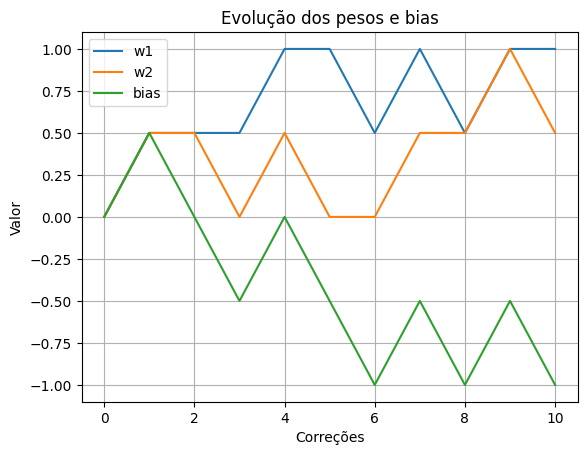

In [10]:
#Plotting how the parameter values change throughout training.
neuronAND.graph()

Graphically plotting the decision boundary generated by the perceptron after training. This allows us to visualize how the perceptron separates the classes in the input Cartesian plane (x1, x2).

In [11]:
def plot_decision_boundary(perceptron):
    # Cria o grid
    x = np.linspace(-0.5, 1.5, 100)

    # Cálculo da fronteira: w1*x1 + w2*x2 + bias = 0  => x2 = -(w1*x + bias)/w2
    if perceptron.w2 != 0:
        y = -(perceptron.w1 * x + perceptron.bias) / perceptron.w2
    else:
        y = np.full_like(x, -perceptron.bias)  # Evita divisão por zero

    plt.fill_between(x, y, 1.5, color='lightblue', alpha=0.4, label='Saída = 1')
    plt.fill_between(x, y, -0.5, color='lightcoral', alpha=0.4, label='Saída = 0')

    # Dados de entrada
    inputs = [(0,0), (0,1), (1,0), (1,1)]
    for x1, x2 in inputs:
        out = perceptron.tests(x1, x2)
        plt.scatter(x1, x2, c='blue' if out == 1 else 'red', s=100, edgecolors='black', label=f'{x1},{x2} → {out}')

    plt.plot(x, y, '-k', label='Fronteira de decisão')

    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f"Fronteira de separação do {perceptron.__class__.__name__}")
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.show()


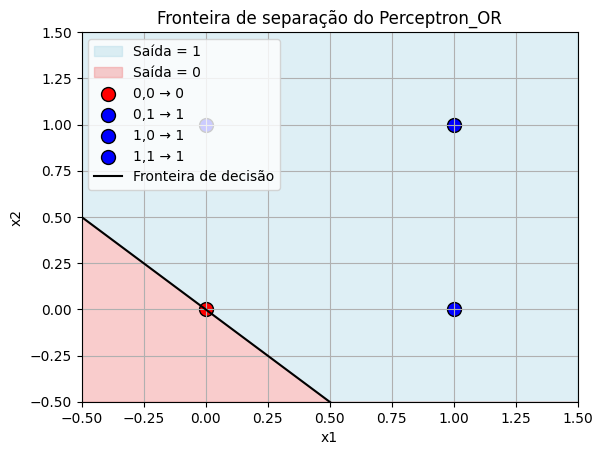

In [12]:
plot_decision_boundary(neuronOR)

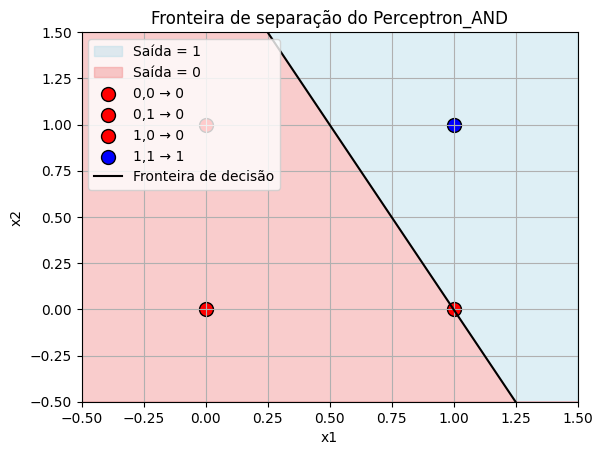

In [13]:
plot_decision_boundary(neuronAND)

Extra : solving XOR problem with the previous neurons that were just created - Creating a Simple MLP

In [14]:
class Perceptron_XOR:   #only works if the input of this perceptron is the output of a OR_perceptron and an AND_perceptron
    def __init__(self, bias, w1, w2, learning_rate=0.3):
        self.bias = bias
        self.w1 = w1
        self.w2 = w2
        self.learning_rate = learning_rate
        self.w1_history = [w1]
        self.w2_history = [w2]
        self.bias_history = [bias]

    def tests(self, out_or, out_and):
        # XOR perceptron using OR and AND outputs as inputs
        test = out_or * self.w1 + out_and * self.w2 + self.bias
        if test > 0:
            return 1
        else:
            return 0

    def train(self, perceptron_or, perceptron_and, max_epochs=100):
        # Training data for XOR: (x1, x2) -> expected XOR output
        training_data = [(0, 0), (0, 1), (1, 0), (1, 1)]
        epochs = 0



        while epochs < max_epochs: #just a better way but it will never reach the max_epochs
            errors = 0
            for x1, x2 in training_data:
                out_or = perceptron_or.tests(x1, x2)  # Output of OR perceptron
                out_and = perceptron_and.tests(x1, x2)  # Output of AND perceptron

                # Check if the XOR perceptron output is valid
                expected_output = x1 ^ x2  # XOR truth table (0 ^ 1 = 1, 1 ^ 0 = 1, etc.)
                if self.tests(out_or, out_and) != expected_output:
                    self.error_correction(x1, x2, out_or, out_and, expected_output)
                    errors += 1

            epochs += 1
            if errors == 0:
                print(f"After {epochs} epochs, perceptron is ready")
                break
        else:
            print(f"Training did not converge after {max_epochs} epochs")

    def error_correction(self, x1, x2, out_or, out_and, expected_output):
        # XOR perceptron error correction
        error = expected_output - self.tests(out_or, out_and)

        delta_bias = self.learning_rate * error
        delta_w1 = self.learning_rate * error * out_or
        delta_w2 = self.learning_rate * error * out_and

        self.w1 += delta_w1
        self.w2 += delta_w2
        self.bias += delta_bias

        self.w1_history.append(self.w1)
        self.w2_history.append(self.w2)
        self.bias_history.append(self.bias)

    def graph(self):
        epochs = range(len(self.w1_history))

        plt.plot(epochs, self.w1_history, label="w1")
        plt.plot(epochs, self.w2_history, label="w2")
        plt.plot(epochs, self.bias_history, label="bias")
        plt.xlabel("Corrections (Epochs)")
        plt.ylabel("Value")
        plt.title("Evolution of weights and bias")
        plt.legend()
        plt.grid(True)
        plt.show()

    def __str__(self):
        return f"{self.__class__.__name__}: {''.join([f'{key} = {value} / ' for key, value in self.__dict__.items()])}"


In [15]:
neuronXOR = Perceptron_XOR(bias=0, w1=0, w2=0,learning_rate=0.5)
neuronXOR.train(neuronOR,neuronAND)
print(neuronXOR)

After 5 epochs, perceptron is ready
Perceptron_XOR: bias = 0.0 / w1 = 0.5 / w2 = -1.0 / learning_rate = 0.5 / w1_history = [0, 0.5, 0.0, 0.5, 0.0, 0.5, 0.5] / w2_history = [0, 0.0, -0.5, -0.5, -1.0, -1.0, -1.0] / bias_history = [0, 0.5, 0.0, 0.5, 0.0, 0.5, 0.0] / 


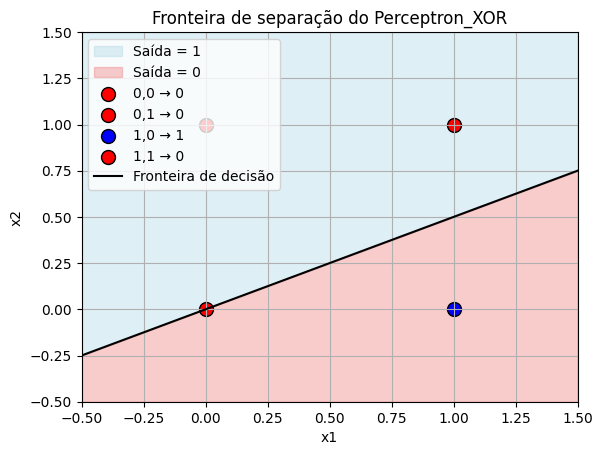

In [16]:
plot_decision_boundary(neuronXOR)